***Todos os vídeos usados nessa aula podem ser encontrados no site https://www.pexels.com/pt-br/***

Nesta aula faremos a detecção das landmarks do rosto. A lógica por trás desse código é uma junção das aulas anteriores, mas aplicadas ao reconhecimento facial.

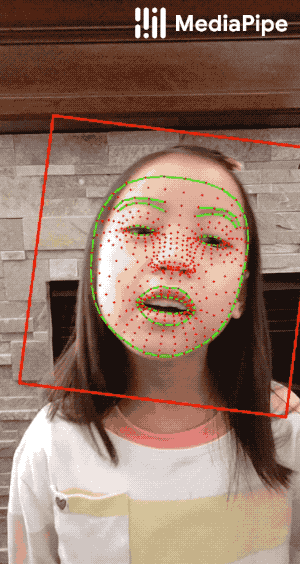

A diferença entre essa aula e a Aula 5 é que aqui vamos conseguir captar as expressões faciais além do reconhecimento. E como curiosidade, são 468 landmarks que o Mediapipe capta!

Os vídeos usados nesta aula são os mesmos usados na Aula 5.

Antes de começar efetivamente, devemos instalar duas bibliotecas: a Mediapipe e a OpenCV. Para isso, faremos de duas maneiras. A primeira é usando o **pip** no prompt de comando:
- Para o Mediapipe: `pip install mediapipe`
- Para o OpenCV: `pip install opencv-python`

Se você estiver usando o Jupyter pode fazer isso dentro de uma célula de comando, basta colocar um ponto de exclamação (!) no começo:
- Para o Mediapipe: `!pip install mediapipe`
- Para o OpenCV: `!pip install opencv-python`

### Importar as bibliotecas

In [1]:
import cv2  # OpenCV
import mediapipe as mp  # Mediapipe
import time  # usada para verificar o FPS

### Criar os módulos

Vamos criar alguns módulos para que fique mais fácil de fazer o código e mais legível (além de evitar bugs).

In [2]:
# Malha do rosto
mpMalhaRosto = mp.solutions.face_mesh
malha_rosto = mpMalhaRosto.FaceMesh(max_num_faces=2)

# Desenhar a malha no rosto
mp_desenho = mp.solutions.drawing_utils

Vamos saber o que tem dentro desse nosso módulo *maos* criado. Para isso, basta colocar dois pontos de interrogação (??) antes do módulo que abrirá uma janela com o código fonte.

In [3]:
??malha_rosto

Há quatro parâmetros em nosso módulo *malha_rosto*, vamos ver o que fazem:
- `static_image_mode`: Se definido como **False**, este parâmetro detectara as mãos nas primeiras capturas, e se forem bem sucedidas, começa o processo de rastreamento. As imagens capturadas subsequentemente não serão mais detectadas, mas sim rastradas através do landmarks. A detecção só será feita novamente se o parâmetro perder a referência das mãos. Se definido como **True**, a detecção ocorre a cada captura de imagem, é ideal usar para um lote de imagens estáticas, pois usado para captura de vídeo, deixará o processo muito lento. O padrão é **False**.
- `max_num_faces`: Informa o número de rostos a serem detectados. O padrão é **1**.
- `min_detection_confidence`: Valor de confiança mínimo entre 0 e 1 para que a detecção seja considerável confiável. O padrão é **0.5**.
- `min_tracking_confidence`: Valor de confiança mínimo entre 0 e 1 para que o rastreamento seja registrado. Caso o valor retornado seja menor do que o solicitado, na próxima captura de vídeo será feito a detecção automaticamente. Se `static_image_mode` for **True**, esse valor de confiança é descartado. O padrão é **0.5**.

### Taxa de FPS

O FPS é a taxa de quantas fotos está sendo mostrada por segundo. Os vídeo ficaram entre 25 e 30 FPS, mas se algum deles ficou muito rápido (mais do que 70 FPS), você pode alterar o valor de `cv2.waitKey()` para um valor maior de delay.

In [4]:
tempo_anterior = 0
tempo_atual = 0

### Captura de vídeo

In [12]:
# Informar se será um vídeo (passar o caminho), o a webcam (passar o valor 0)
video = 0
cap = cv2.VideoCapture(video)

while True:
    sucesso, imagem = cap.read()
    
    # Converter a cor da imagem (o Mediapipe usa somente imagens em RGB e o OpenCV captura em BGR)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    
    # Resultado do processamento da imagem
    resultados = malha_rosto.process(imagem_rgb)
    
    # Colocar a malha no rosto
    if resultados.multi_face_landmarks:
        for rosto_landmarks in resultados.multi_face_landmarks:
            # em ordem: imagem, landmarks, conexões, estilo das landmarks, estilo das conexões
            mp_desenho.draw_landmarks(imagem, rosto_landmarks, mpMalhaRosto.FACEMESH_CONTOURS,
                                     mp_desenho.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                                     mp_desenho.DrawingSpec(color=(0, 255, 0), thickness=1))
            
            for item, landmark in enumerate(rosto_landmarks.landmark):    
                # transformar os pontos em valores de pixel
                altura, largura, canal = imagem.shape
                x, y = int(landmark.x*largura), int(landmark.y*altura)
                
                
    
    # Configurar o FPS de captura
    tempo_atual = time.time()
    fps = 1/(tempo_atual - tempo_anterior)
    tempo_anterior = tempo_atual
    
    # Mostrar o FPS na tela
    # em ordem: a iamgem que será colocado o texto, o texto, a posição na imagem, fonte, tamanho, cor e largura
    cv2.putText(imagem, f'FPS: {int(fps)}', (20, 70), cv2.FONT_HERSHEY_PLAIN, 3, (255, 0, 0), 2)
    
    # Mostrar imagem na tela
    cv2.imshow('Imagem', imagem)
    
    # Terminar o loop
    if cv2.waitKey(1) & 0xFF == ord('s'):
        break
        
# Fechar a tela de captura
cap.release()
cv2.destroyAllWindows()